# Example IPython Notebook

## The notebook menus

- **File** menu we can save the notebook, create a new notebook, or download a notebook in various formats
- **Edit** menu we can perform cell-level operations such as copy/paste/cut/split/merge/search-replace
- **View** menu allows to determine toolbar visibility
- **Insert** menu to insert new cells
- **Cell** menu run groups of cells, clear output
- **Kernel** menu allows to interrupt or restart the kernel
- **Help** menu provides access to a '*UI tour*', '*Keyboard shortcuts*' and links to online help

Top right we can see that this notebook is running under a Python3 kernel, and so we see the Python logo.


## IPython magics

As we are running the IPython kernel we have access to the kernel magics as shown here by the %lsmagic command.

These commands allow to create aliases, to break out into shell commands, Ruby, Perl, HTML, javascript, SVG as required.


In [27]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%rub

#### For example we can specify the %%html cell magic

This will have access to javascript, CSS, SVG (unlike the markdown)



In [30]:
%%html

<div id="TEST_DIV"> HERE IS SOME PLACEHOLDER TEXT </div>

#### Now we can execute some javascript (*jQuery*) to modify the above text

In [29]:
%%html

<script>
    $('#TEST_DIV').text('I used to say <' + $('#TEST_DIV').text() + '>');
</script>

In [31]:
%%perl

print("Hello EuroPython - can we be friends?")

Hello EuroPython - can we be friends?

#### We can use '*!*' to execute an external shell and return the results

In [25]:
FILES = !ls *.ipynb

print(FILES)

['Demo__HTML_CSS_JavaScript_SVG.ipynb', 'Demo_0_INDEX.ipynb', 'Demo_html_find.ipynb', 'Demo_IPython_Notebook.ipynb', 'Demo_Metakernel_Bash.ipynb', 'Demo_Perl6-1liners.ipynb', 'MOOC_Coursera_R.ipynb', 'pythreejs.ipynb']


In [26]:
FILTER="HTML"

FILES = !ls | grep $FILTER
print(FILES)

['Demo__HTML_CSS_JavaScript_SVG.ipynb']


# Markdown cells

This is a markdown cell, where we can put markdown text and even HTML to be rendered.

<b style="color:red;">DOUBLE CLICK on the cell TO EDIT</b>
- list item 1
- list item 2

** Some bold text **


#### Markdown can even be used to create mathematical formulae

This formula can be created
    $$F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx$$

by entering this text into the markdown

```
$$F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx$$
```

it will be rendered as a mathematical formula by the MathJax library

# Rich Media and Plotting from Python

We use '*%matplotlib inline*' magic to specify that plots should appear in the notebook, not in an external window.

In [32]:
%matplotlib inline

In [33]:
from matplotlib import pyplot as plt
import numpy as np

In [37]:
from ipywidgets import *
from IPython.display import display
from IPython.display import HTML

#### Inserting HTML from within Python


In [40]:
html='<b> some bold text </b>'

HTML( html )

#### We can even embed an IFrame in an output cell

In [41]:
html='<iframe src="http://localhost:8888/notebooks/Demos/Demo_0_INDEX.ipynb#NOTEBOOK" width=1400 height=350></iframe>'

HTML(html)

## Plotting with --interactive-- parameters

Below we have defined a `plot_sin` function that plots $sin(ax+b)$ over the interval $[0,4\pi]$.

In [51]:
# %load soln/param_plot_1.py
def plot_sin(freq, phase, color, reverse=True):
    x = np.linspace(0,4*np.pi, 100)
    rev=1
    if reverse:
        rev=-1
    y = rev * np.sin(freq*x+phase)
    plt.plot(x,y, color)

Now we can use `interact` to create a user interface for exploring your function.

We provide parameters a and b as tuples specifying that:

* `freq` will be a floating point number over the interval $[0.0,5.0]$.
* `phase` will be a floating point number over the interval $[-5.0,5.0]$.

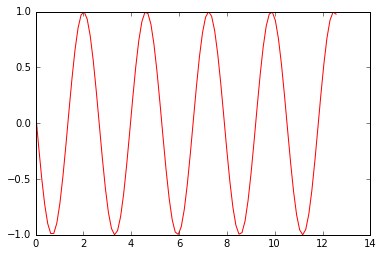

In [52]:
interact(plot_sin, freq=(0.0,5.0,0.1), phase=(-5.0,5.0,0.1), color=['red','blue','green'], rev=True);

In matplotlib, the line style and color can be set with a third argument to `plot`. Examples of this argument:

* dashed red: `r--`
* blue circles: `bo`
* dotted black: `k.`

Add a `style` argument to your `plot_sin` function that allows you to set the line style of the plot.

Use `interact` to create a UI for `plot_sin` that has a drop down menu for selecting the line style between a **dotted red** line and a **dashed black line**. This time use `interact` as a decorator.

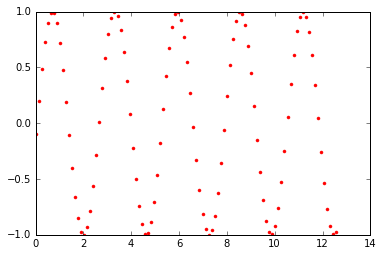

In [47]:
# %load soln/param_plot_2.py
@interact(a=(0.0,5.0,0.1), b=(-5.0,5.0,0.1),
         style={'dotted red': 'r.', 'dashed black': 'k--'})
def plot_sin2(a, b, style='r.'):
    x = np.linspace(0,4*np.pi, 100)
    y = np.sin(a*x+b)
    plt.plot(x, y, style)

## Simple data explorer

In this exercise, you will use interact to build a UI for exploring correlations between different features in the [Iris dataset](http://en.wikipedia.org/wiki/Iris_flower_data_set) in [sklearn]http://scikit-learn.org/stable/(http://scikit-learn.org/stable/). This data contains 4 different measurements (called features in this content) of 150 different iris flowers of three different species.

Load the dataset:

In [14]:
from sklearn.datasets import load_iris
iris_data = load_iris()

The actual data is stored as a NumPy array under the `data` attribute:

In [15]:
iris_data.data.shape

(150, 4)

You can see the meanings of the 4 columns of data by looking at the `feature_names` attribute:

In [16]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Write a `plot_iris` function that creates a scatter plot (using `plt.scatter`) of two columns of this dataset. Your function should have the following signature:

```python
def plot_iris(a, col1, col2):
    ...
```

where `a` is the NumPy array of data and `col1/col2` are the two columns to use for the scatter plot.

Use `interact` to build a UI to explore the iris dataset using your `plot_iris` function. You will need to use the `fixed` function when passing the dataset to the function.

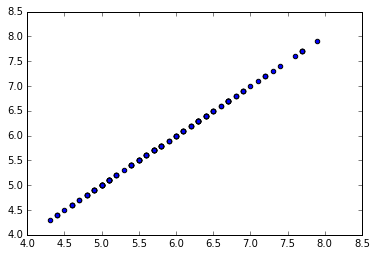

In [17]:
# %load soln/data_explorer.py
def plot_iris(a=None, col1=0, col2=0):
    plt.scatter(a[:,col1], a[:,col2])

interact(plot_iris, a=fixed(iris_data.data), col1=(0,3), col2=(0,3));